## UTS

Lakukan analisa terhadap data pada  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra  dengan menggunakan klasifikasi

- metode KNN

- metode pohon keputusan (Desision tree)

Proses analisa dilaporkan dan diupload di github ( menggunakan jupyter book)

### Metode KNN



*   Connect to google drive
*   Import Library





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt



*   Ambil data



In [3]:
%cd /content/drive/MyDrive/datamining/tugas/data/

/content/drive/MyDrive/datamining/tugas/data


In [4]:
data = pd.read_csv("dataR2.csv")
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1




*   Cek dataset



In [5]:
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [6]:
print(len(data),len(data.columns))

116 10




*   Exploratory data analysis



In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB




*   Visualisasi *correlation grid*



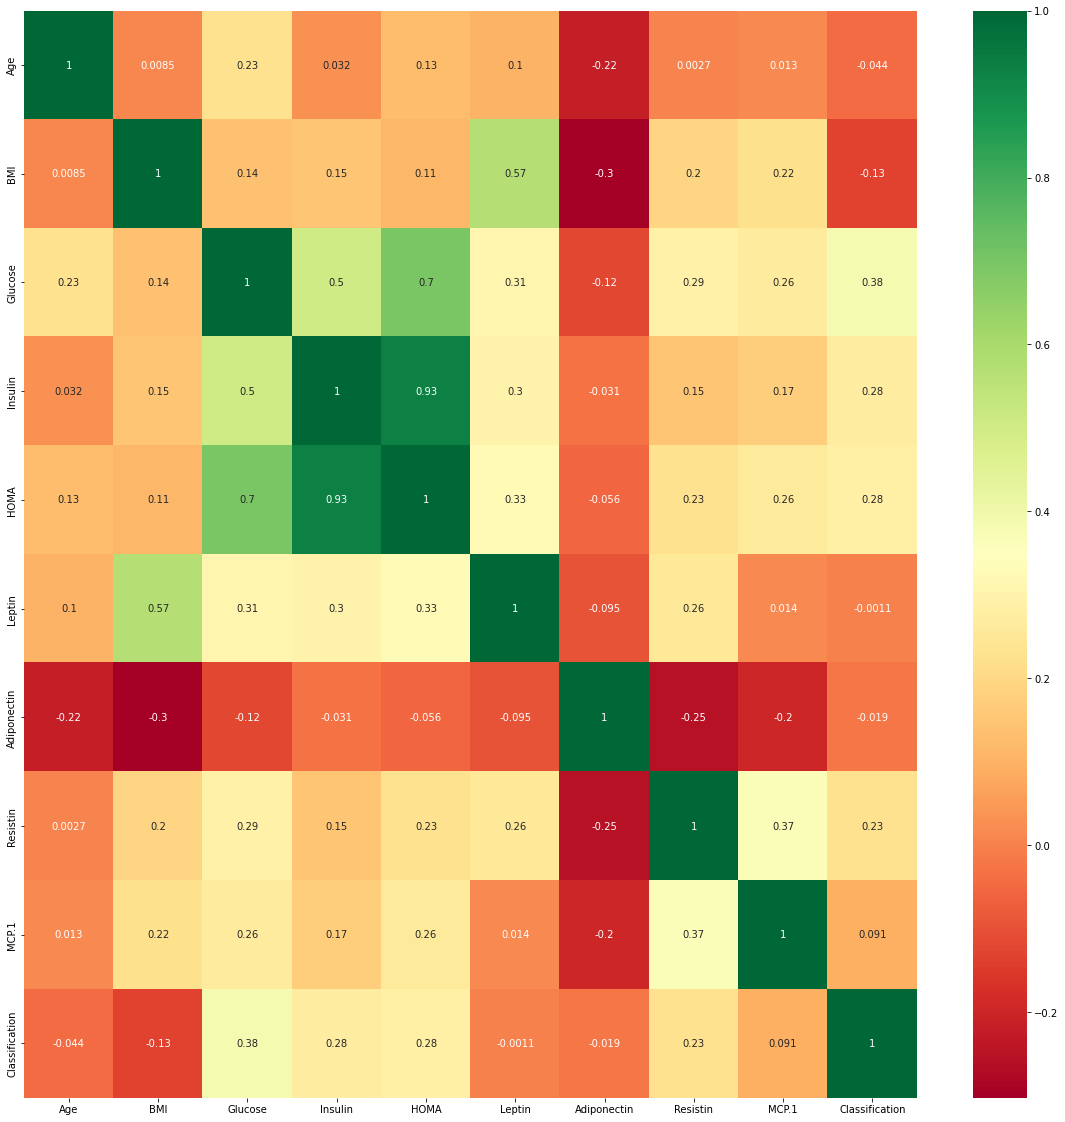

In [9]:
plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(),cmap='RdYlGn',annot=True)

In [16]:
# create the features from data
X=data.iloc[:,0:9]

# create the target variable from data
Y=data.iloc[:,9]

In [17]:
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [18]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classification, dtype: int64



*   Menggunakan Standardisasi untuk membawa semua nilai ke satu unit karena KNN adalah metode berbasis jarak



In [19]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)
X=pd.DataFrame(X)



*   Splitting of Dataset untuk uji



In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3)



*   Membangun classifier KNeighbors menggunakan simulasi nilai k yang berbeda



In [23]:
#Importing KNeighbors Classifier from sklearn
#Finding accuracies  on TrainData and Test data with euclidean distance(by default p=2)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
for x in range(5,10,2):
    knn=KNeighborsClassifier(n_neighbors=x,metric='minkowski',weights='distance')
    knn.fit(xtrain,ytrain)
    train_ypred=knn.predict(xtrain)
    acc_train_score=accuracy_score(train_ypred,ytrain)
    test_ypred=knn.predict(xtest)
    acc_test_score=accuracy_score(test_ypred,ytest)
    print(f'Skor akurasi untuk data uji adalah {acc_train_score} and {acc_test_score} untuk {x} neighbours')

Skor akurasi untuk data uji adalah 1.0 and 0.8571428571428571 untuk 5 neighbours
Skor akurasi untuk data uji adalah 1.0 and 0.6857142857142857 untuk 7 neighbours
Skor akurasi untuk data uji adalah 1.0 and 0.6857142857142857 untuk 9 neighbours




*   Membangun classifier KNeighbors menggunakan Eucledian Distance dan 7 neighbours



In [24]:
knn=KNeighborsClassifier(n_neighbors=7,metric='minkowski',weights='distance')
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [26]:
# Predicting for train data
trainypred=knn.predict(xtrain)



*   Finding the precision, recall, f1-score ,support



In [28]:
# Classification report on train data set
from sklearn.metrics import classification_report
print(classification_report(trainypred,ytrain))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        50

    accuracy                           1.00        81
   macro avg       1.00      1.00      1.00        81
weighted avg       1.00      1.00      1.00        81



In [29]:
# Mencari skor akurasi
accuracy_score(trainypred,ytrain)

1.0



*   Memprediksi data tes



In [30]:
testypredicted=knn.predict(xtest)

In [31]:
# Skor akurasi data tes
from sklearn.metrics import accuracy_score
accuracy_score(testypredicted,ytest)

0.6857142857142857

### Metode *Decision Tree*

**Classification**

In [87]:
# classifying
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from io import StringIO


# pretty printing
from pprint import pprint

# visualizing 
import matplotlib.pyplot as plt
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [88]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# The shape of the data matrix (without class attribute)
print("Matrix shape: " + repr(data.data.shape))
# The names of the features
print("The data set has the following features:")
pprint(data.feature_names)
# The names of the classes
print("The data set has the following classes:")
pprint(data.target_names)

pprint(data.data[1])

# This prints a rather long descriptions.
# print(data.DESCR)

Matrix shape: (569, 30)
The data set has the following features:
array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')
The data set has the following classes:
array(['malignant', 'benign'], dtype='<U9')
array([2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
       8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
       3.398e+00, 7.408e+01, 5.225e-03, 1.308

In [89]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(data.data[:,0:9],data.target,shuffle=True,test_size=0.3, random_state=42)

In [90]:
# DECISION TREE
# initialize the model with standard parameters
clf_dt = DecisionTreeClassifier(criterion="entropy")
# train the model
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [91]:
# Evaluating on the test data
y_test_pred = clf_dt.predict(X_test);
a_dt_test = accuracy_score(y_test, y_test_pred);

# Evaluating on the training data
y_train_pred = clf_dt.predict(X_train);
a_dt_train = accuracy_score(y_train, y_train_pred);

print("Training data accuracy is " +  repr(a_dt_train) + " and test data accuracy is " + repr(a_dt_test))

Training data accuracy is 1.0 and test data accuracy is 0.9532163742690059


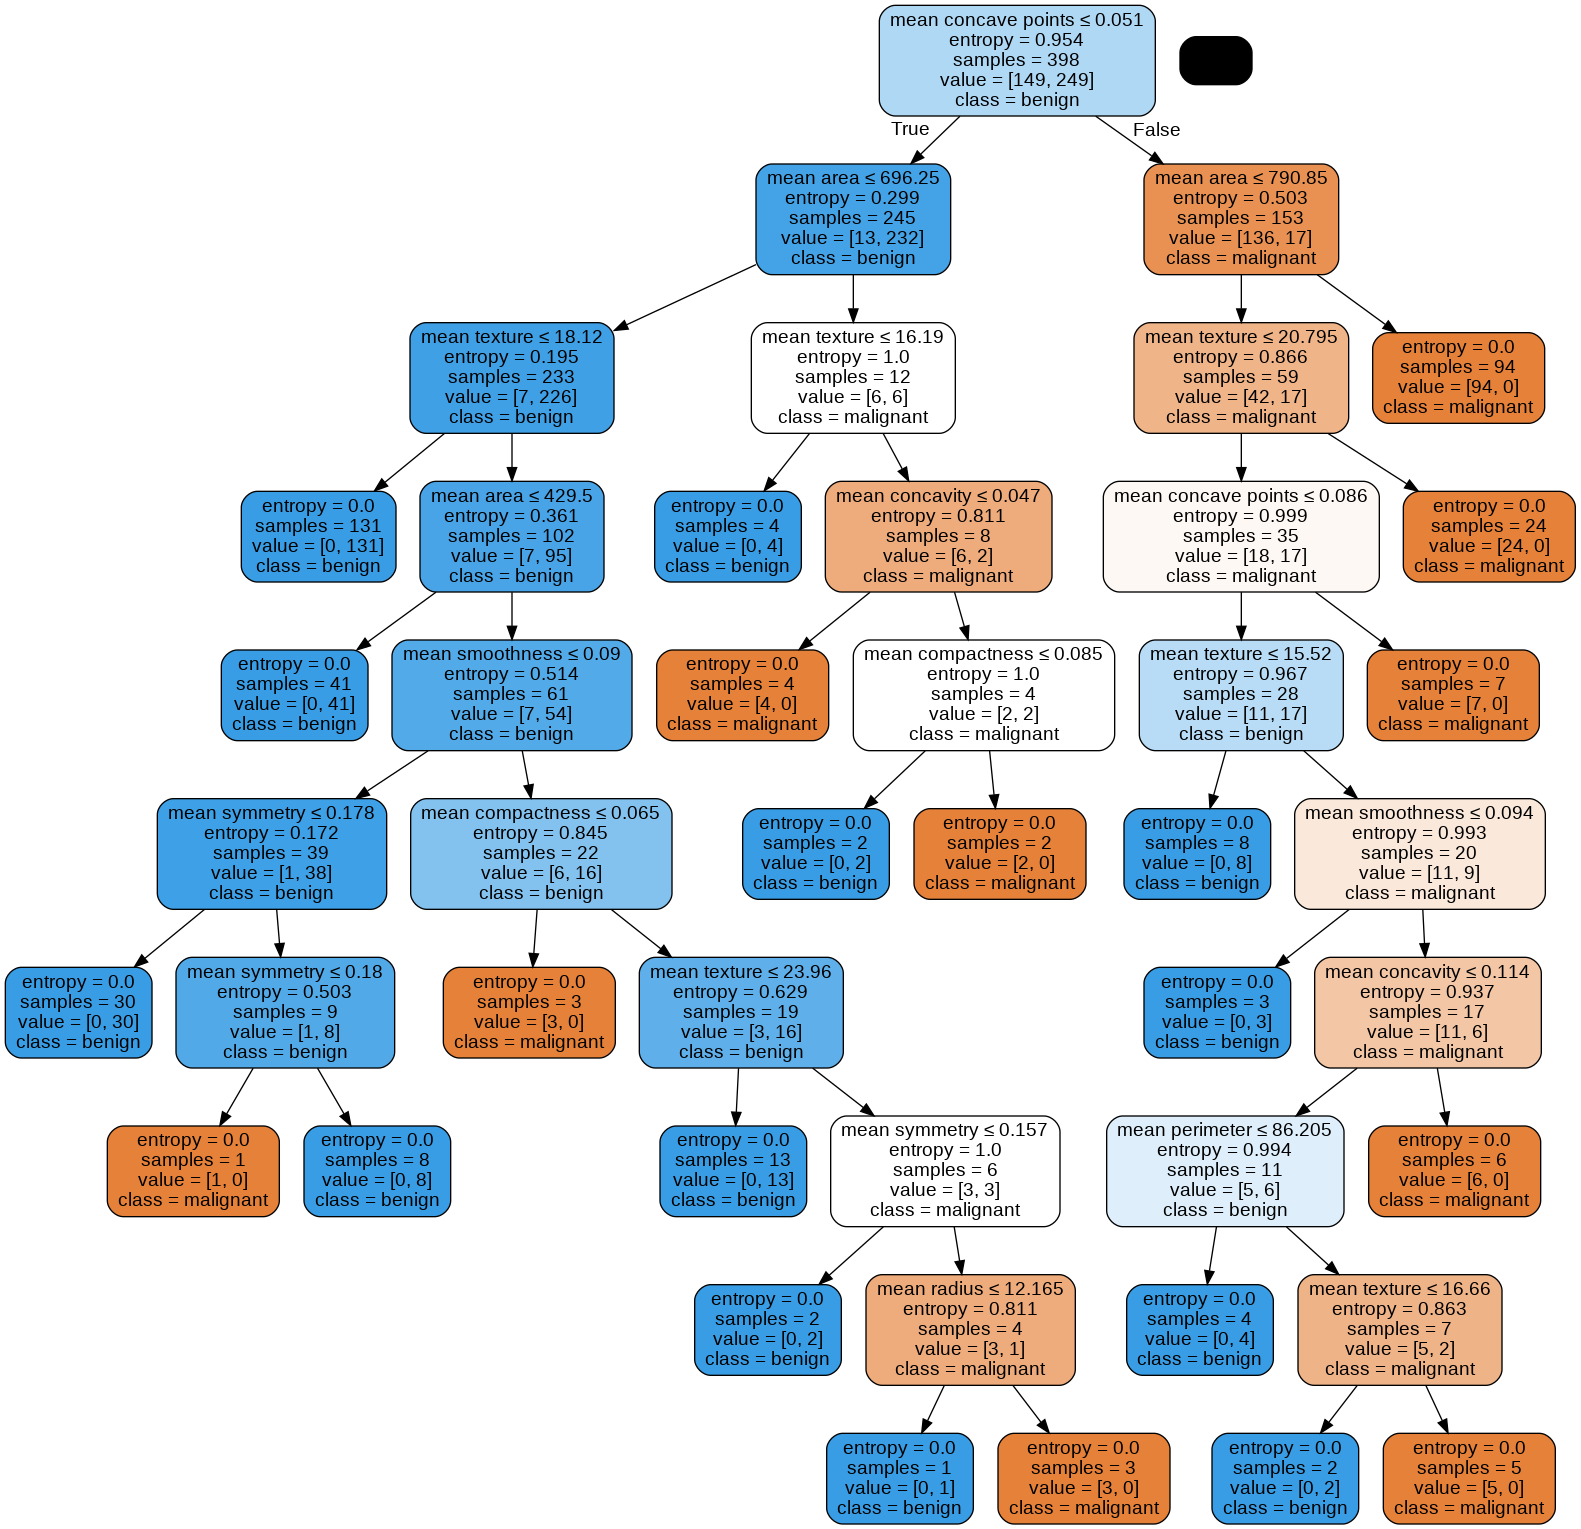

In [92]:
dot_data = StringIO()
export_graphviz(clf_dt, out_file=dot_data,
                feature_names=data.feature_names[0:9],  
                class_names=data.target_names,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())